# **Miniproyecto 2:** Aplicación algoritmo Random Forest y KNN para un caso propuesto
_____________________________________________________________________________________

# 1. Importar librerías

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydotplus
import graphviz
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

import tqdm

# 2. Cargar archivos

In [8]:
df1 = pd.read_csv('Featuresdataset.csv', sep=',')
df2 = pd.read_csv('salesdata-set.csv', sep=',')
df3 = pd.read_csv('Tabla_1.csv', sep=',')

In [9]:
print('Featuresdataset.csv')
df1.head(10)

Featuresdataset.csv


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [10]:
print('salesdata-set.csv')
df2.head(10)

salesdata-set.csv


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [11]:
print('Tabla_1.csv')
df3.head(10)

Tabla_1.csv


,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,0,5,16,16/09/2011,564312.734549,False,32.687061,3.526,9691.276227,464.157260,21484.678945,15838.706634,10074.683942,216.603308,6.529,False
1,1,21,52,24/06/2011,169199.146654,False,59.608361,3.594,35052.144316,33433.615110,23406.818748,10586.568174,18348.012177,214.744111,7.931,False
2,2,9,24,27/01/2012,76445.807545,False,16.623822,3.290,13763.521756,33784.341040,26138.012756,21585.291347,1582.360568,223.806053,5.667,False
3,3,6,60,05/08/2011,529384.632399,False,36.466380,3.684,7446.306499,2438.613334,5175.440486,10227.979090,8692.253401,217.083989,6.925,False
4,4,17,42,23/12/2011,590421.125970,False,92.396503,3.186,2679.329519,9565.582845,23651.312194,12981.884477,10443.878610,129.984548,6.617,False
5,5,31,87,24/08/2012,556894.615504,False,43.412585,3.620,74319.059467,37408.818862,18482.402292,20620.695196,3846.379089,221.808352,6.565,False
6,6,21,83,19/03/2010,682722.852234,False,52.963927,2.720,78985.685314,31341.343607,12708.044607,5875.072096,688.137256,210.873332,8.324,False
7,7,4,29,30/09/2011,70387.018913,False,74.145519,3.371,9436.763466,41393.898678,29216.144403,15784.237223,7165.225061,129.606067,5.644,False
8,8,20,16,24/12/2010,326232.854841,False,26.041172,3.141,3564.696521,5771.074248,18289.236301,4481.732712,405.051798,204.637673,7.484,False
9,9,22,46,27/05/2011,436981.323825,False,28.162576,4.034,85035.636423,4078.768416,20681.908333,3242.237108,12731.765498,138.678283,8.252,False


# 3. Revisión de los datasets

3.1 Revisión de los atributos de cada dataset

In [12]:
print('Featuresdataset.csv')
print(df1.columns.tolist())
print('salesdata-set.csv')
print(df2.columns.tolist())
print('Tabla_1.csv')
print(df3.columns.tolist())

Featuresdataset.csv
['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
salesdata-set.csv
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
Tabla_1.csv
['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y']


3.2 Número de filas y atributos de cada dataset

In [13]:
print('Featuresdataset.csv')
print(df1.shape)
print('salesdata-set.csv')
print(df2.shape)
print('Tabla_1.csv')
print(df3.shape)

Featuresdataset.csv
(8190, 12)
salesdata-set.csv
(421570, 5)
Tabla_1.csv
(50, 16)


# 4. Unir datasets

4.1 Merge datasets

- Dado que los atributos 'Store' y 'Date' se encuentran tanto en el dataframe 1 como el dataframe 2, se eligen como parámetros para realizar el merge.

In [14]:
df = pd.merge(df2, df1, on=['Store', 'Date'], how='left')
df.head(25)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,1,12/03/2010,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,1,19/03/2010,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,1,26/03/2010,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,1,02/04/2010,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,1,09/04/2010,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


4.2 Número de filas y atributos

In [15]:
print('Numero de filas y atributos df')
df.shape

Numero de filas y atributos df


(421570, 15)

4.3 Datos estadísticos

In [16]:
print("Datos estadísticos df")
df.describe(include='all')

Datos estadísticos df


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
count,421570.000000,421570.000000,421570,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570
unique,NaN,NaN,143,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,23/12/2011,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,3027,NaN,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,NaN


4.4 Datos únicos por atributo

In [17]:
print("Datos únicos por atributo df")
df.nunique()

Datos únicos por atributo df


Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday_x          2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday_y          2
dtype: int64

4.5 Datos NA por atributo

In [18]:
print('Datos NA por atributo df')
pd.isna(df).sum()

Datos NA por atributo df


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

4.6 Tipos de datos por atributo

In [19]:
print('Tipos de datos por atributo df')
df.dtypes

Tipos de datos por atributo df


Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

# 5. Preprocesamiento

5.1 Comportamiento de 'Weekly_Sales', 'Fuel_Price', 'CPI' y 'Unemployment' versus 'IsHoliday_x'

Para este análisis, se elige predecir el atributo 'IsHoliday_x', el cual será el vector de label(y). Para elegir aquellos atributos que conformarán la matrix de atributos(x), el siguiente análisis apunta a encontrar patrones en relación 'IsHoliday_x' mediante la visualización de los datos por medio de gráficos.

Ahora bien, si pensamos en el comportamiento de la gente en relación a un dia festivo, podemos inferir que si los centros comerciales no cierran en estos días, las personas podrían consumir más. Por lo tanto, las variables que más podrían ayudar a describir este comportamiento serían: 'Weekly_Sales', 'Fuel_Price', 'CPI' y 'Unemployment'. Por otra parte, lo ventajoso de estos atributos es que no presentan datos faltantes (NA), lo cual ayudará a nuestro modelo de predicción.



- Gráfico 'Weekly_Sales' vs 'IsHoliday_x'

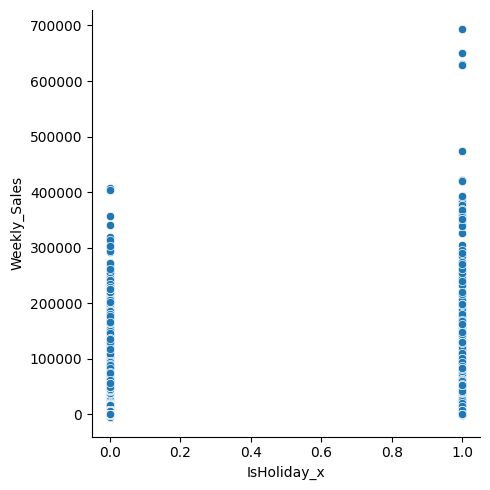

In [20]:
g_1 = sns.relplot(data=df, x='IsHoliday_x', y='Weekly_Sales')
g_1

- Gráfico 'Fuel_Price' vs 'IsHoliday_x'

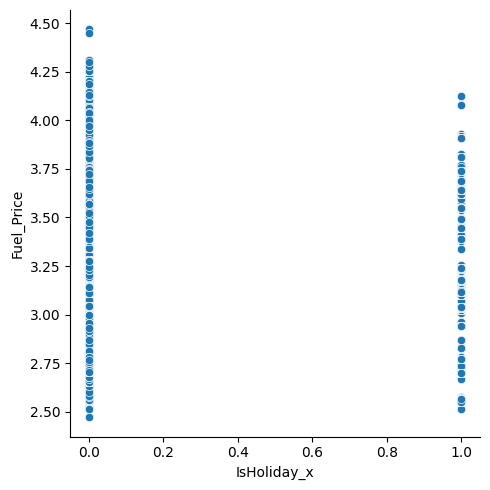

In [21]:
g_2 = sns.relplot(data=df, x='IsHoliday_x', y='Fuel_Price')
g_2

- Gráfico 'CPI' versus 'IsHoliday_x'

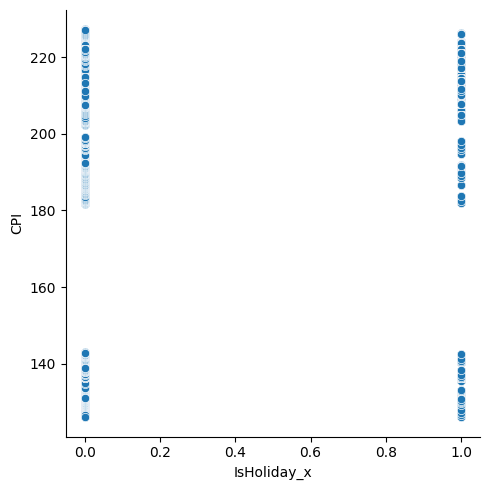

In [22]:
g_3 = sns.relplot(data=df, x='IsHoliday_x', y='CPI')
g_3

- Gráfico 'Unemployment' vs 'IsHoliday_x'

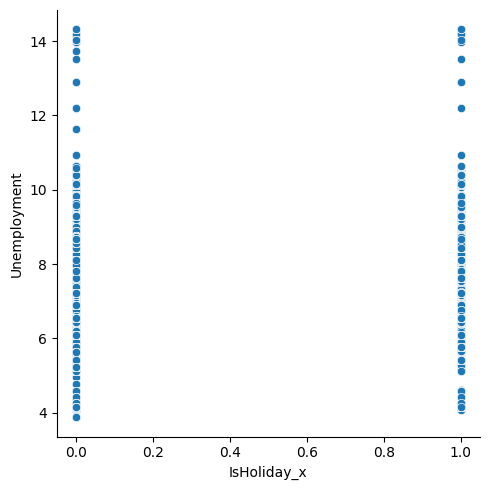

In [23]:
g_4 = sns.relplot(data=df, x='IsHoliday_x', y='Unemployment')
g_4

5.2 Label encoder de 'IsHoliday_x'

In [24]:
le = LabelEncoder()
df['IsHoliday_x'] = le.fit_transform(df['IsHoliday_x'])
df['IsHoliday_x']

0         0
1         1
2         0
3         0
4         0
         ..
421565    0
421566    0
421567    0
421568    0
421569    0
Name: IsHoliday_x, Length: 421570, dtype: int64

5.3 Separación matriz de atributos y vector de label

- **x** contiene los valores de los atributos 'Weekly_Sales' y 'Fuel_Price'
- **y** contiene los valores del atributo 'IsHoliday_x'

In [25]:
x= df.iloc[:, [3, 6]].values
y= df.iloc[:,4].values

5.4 Normalización

Para la Normalización se ocupa StandarScaler (función: z = (x - u) / s) dado que los algoritmos KNN y Ramdom Forest se comportan de mejor manera con esta estandarización.

In [26]:
x= StandardScaler().fit_transform(x)
x

array([[ 0.39378188, -1.72083413],
       [ 1.32350071, -1.77317713],
       [ 1.1278286 , -1.84732972],
       ...,
       [-0.65695633,  1.39357464],
       [-0.67021017,  1.32596493],
       [-0.65626152,  1.13622153]])

5.5 Dividir dataset en training y testing set

Se selecciona aleatoriamente el 80% training y 20% testing, debido a que no hay muchos datos para cuando 'IsHoliday_x' es True

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# 6. KNN

6.1 Busqueda del mejor K con weights='distance' y algorithm='kd_tree'

- Se modifica el parámetro **n_neighbors** en un rango de 1 a 50

In [28]:
err = []

for i in range(1, 50):
    'Modelo'
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', algorithm='kd_tree') # se deben variar además de n_neighbors, weights y algorithm u otros

    'Entrenamiento'
    knn.fit(x_train, y_train)

    'Predicción'
    y_pred_i = knn.predict(x_test)

    'Calculo error en la predicción'
    err.append(np.mean(y_pred_i != y_test))

- Se grafica el error medio en función de K

Text(0, 0.5, 'Mean Error')

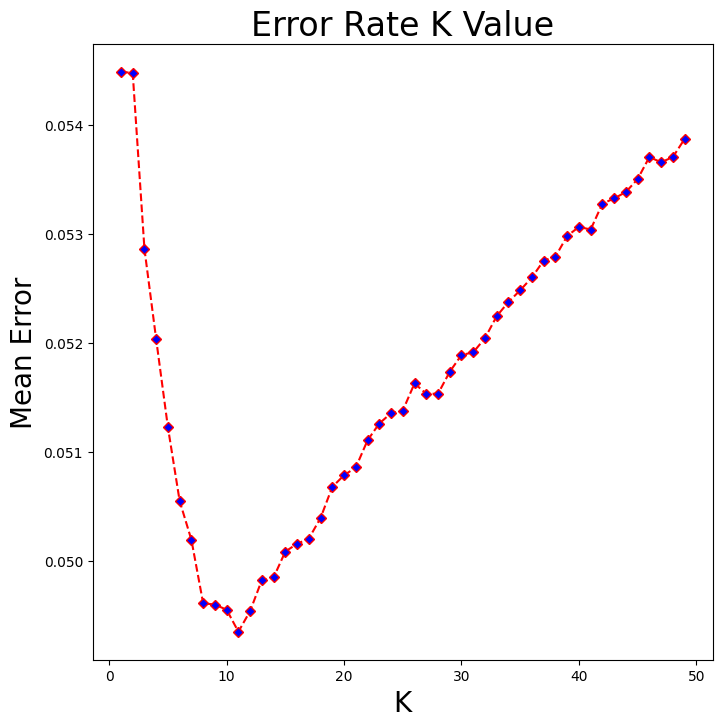

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot() 

ax.plot(range(1, 50), err, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Error Rate K Value',fontsize=24)
ax.set_xlabel('K',fontsize=20)
ax.set_ylabel('Mean Error',fontsize=20)

- Mejor K

In [30]:
k_optimo = np.where(err==np.min(err))[0][0]+1
print('Mejor K =', k_optimo)

Mejor K = 11


- Cálculo de la 'Accuracy' con K=11

In [31]:
'Modelo'
KNN_mejorK = KNeighborsClassifier(n_neighbors=k_optimo, weights='distance',algorithm='kd_tree')
'Entrenamiento'
KNN_mejorK.fit(x_train, y_train)
'Predicción'
y_pred_mejorK = KNN_mejorK.predict(x_test)
'error medio'
print('Menor error medio con k=%i : %.3f' % (k_optimo,np.mean(y_pred_mejorK != y_test)*100),'%')
'Accuracy'
print('Accuracy con k=%i : %.3f' % (k_optimo,metrics.accuracy_score(y_test, y_pred_mejorK)*100),'%')


Menor error medio con k=11 : 4.935 %
Accuracy con k=11 : 95.065 %


6.2 Modelo con K óptimo, weights='uniform', algorithm='kd_tree'

- Se modifica el parámetro **weights**

In [32]:
'Modelo'
KNN_weights = KNeighborsClassifier(n_neighbors=k_optimo, weights='uniform',algorithm='kd_tree')
'Entrenamiento'
KNN_weights.fit(x_train, y_train)
'Predicción'
y_pred_weights = KNN_weights.predict(x_test)
'error medio'
print('Menor error medio con k=%i : %.3f' % (k_optimo,np.mean(y_pred_weights != y_test)*100),'%')
'Accuracy'
print('Accuracy con k=%i : %.3f' % (k_optimo,metrics.accuracy_score(y_test, y_pred_weights)*100),'%')

Menor error medio con k=11 : 5.729 %
Accuracy con k=11 : 94.271 %


6.3 Modelo con K óptimo, weigths='distance', algorithm='brute'

- Se modifica el parámetro **algorithm**

In [33]:
'Modelo'
KNN_algorithm = KNeighborsClassifier(n_neighbors=k_optimo, weights='distance',algorithm='brute')
'Entrenamiento'
KNN_algorithm.fit(x_train, y_train)
'Predicción'
y_pred_algorithm = KNN_algorithm.predict(x_test)
'error medio'
print('Menor error medio con k=%i : %.3f' % (k_optimo,np.mean(y_pred_algorithm != y_test)*100),'%')
'Accuracy'
print('Accuracy con k=%i : %.3f' % (k_optimo,metrics.accuracy_score(y_test, y_pred_algorithm)*100),'%')

Menor error medio con k=11 : 4.935 %
Accuracy con k=11 : 95.065 %


# 7. Ramdom Forest

7.1 Modelo con n_estimators=100, criterion='gini', max_depth=5, max_features='log2'

- Se modifica el parámetro **n_estimators**

In [34]:
'Modelo'
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, max_features='log2')
'Entrenamiento'
clf.fit(x_train,y_train)
'Predicción'
y_predRF = clf.predict(x_test)
'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_predRF)*100),'%')

Accuracy: 93.262 %


7.3 Modelo con n_estimators=100, criterion='entropy', max_depth=5, max_features='log2'

- Se modifica el parámetro **criterion**

In [35]:
'Modelo'
clf_criterion = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, max_features='log2')
'Entrenamiento'
clf_criterion.fit(x_train,y_train)
'Predicción'
y_predRF_criterion = clf_criterion.predict(x_test)
'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_predRF_criterion)*100),'%')

Accuracy: 93.261 %


7.4 Modelo con n_estimators=100, criterion='gini', max_depth=10, max_features='log2'

- Se modifica el parámetro **max_depth**

In [36]:
'Modelo'
clf_maxdepth = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, max_features='log2')
'Entrenamiento'
clf_maxdepth.fit(x_train,y_train)
'Predicción'
y_predRF_maxdepth = clf_maxdepth.predict(x_test)
'Accuracy'
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_predRF_maxdepth)*100),'%')

Accuracy: 94.020 %


7.5 Importancia de las features

Para la importancia de las features se elige el modelo Ramdom Forest con mejor Accuracy (94.020 %), este corresponde a aquel con los siguiente seteo de parámetros: Modelo con n_estimators=100, criterion='gini', max_depth=10, max_features='log2' (Ver punto 7.4).

- Dataframe de la importancia de las Features

Se observa que la diferencia de importancia de las Features, entre los atributos 'Weekly_Sales' y 'Fuel_Price', es bastante significativa, siendo 'Fuel_Price' el atributo más importante con un FeatureValue de 0.962.

In [37]:
name_ = []
importance_ = []
for name, importance in zip(df[['Weekly_Sales', 'Fuel_Price']].columns, clf_maxdepth.feature_importances_):
    name_.append(name)
    importance_.append(importance)

featI = pd.DataFrame(importance_, columns=['FeatureValue'])
featI['FeatureName'] = name_
featI = featI.sort_values(by='FeatureValue', ascending=False)
featI

,FeatureValue,FeatureName
1,0.962655,Fuel_Price
0,0.037345,Weekly_Sales


- Gráfico de la importancia de las Features

Al graficar los valores FeatureValue, las diferencias entre el atributo 'Weekly_Sales' y 'Fuel_Price' se hacen más notorias. Ante estos datos podemos concluir que 'Fuel_Price' es un buen predictor de 'Is_Holiday'.

Text(0.5, 0, 'Importancia de las features')

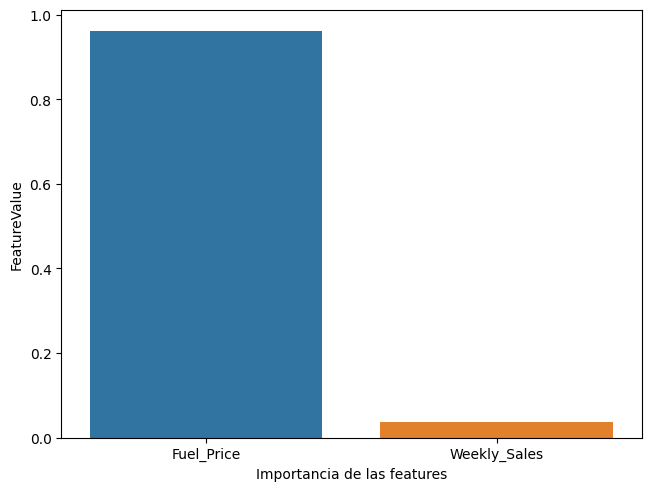

In [38]:
plt.figure(layout='constrained')
sns.barplot(x='FeatureName', y='FeatureValue', data=featI)
plt.xlabel('Importancia de las features')

7.7 Visualización árbol Ramdom Forest

Nota: Si el dpi se setea a 1200 el árbol se ve perfecto. Por tema de procesador lo deje en 100

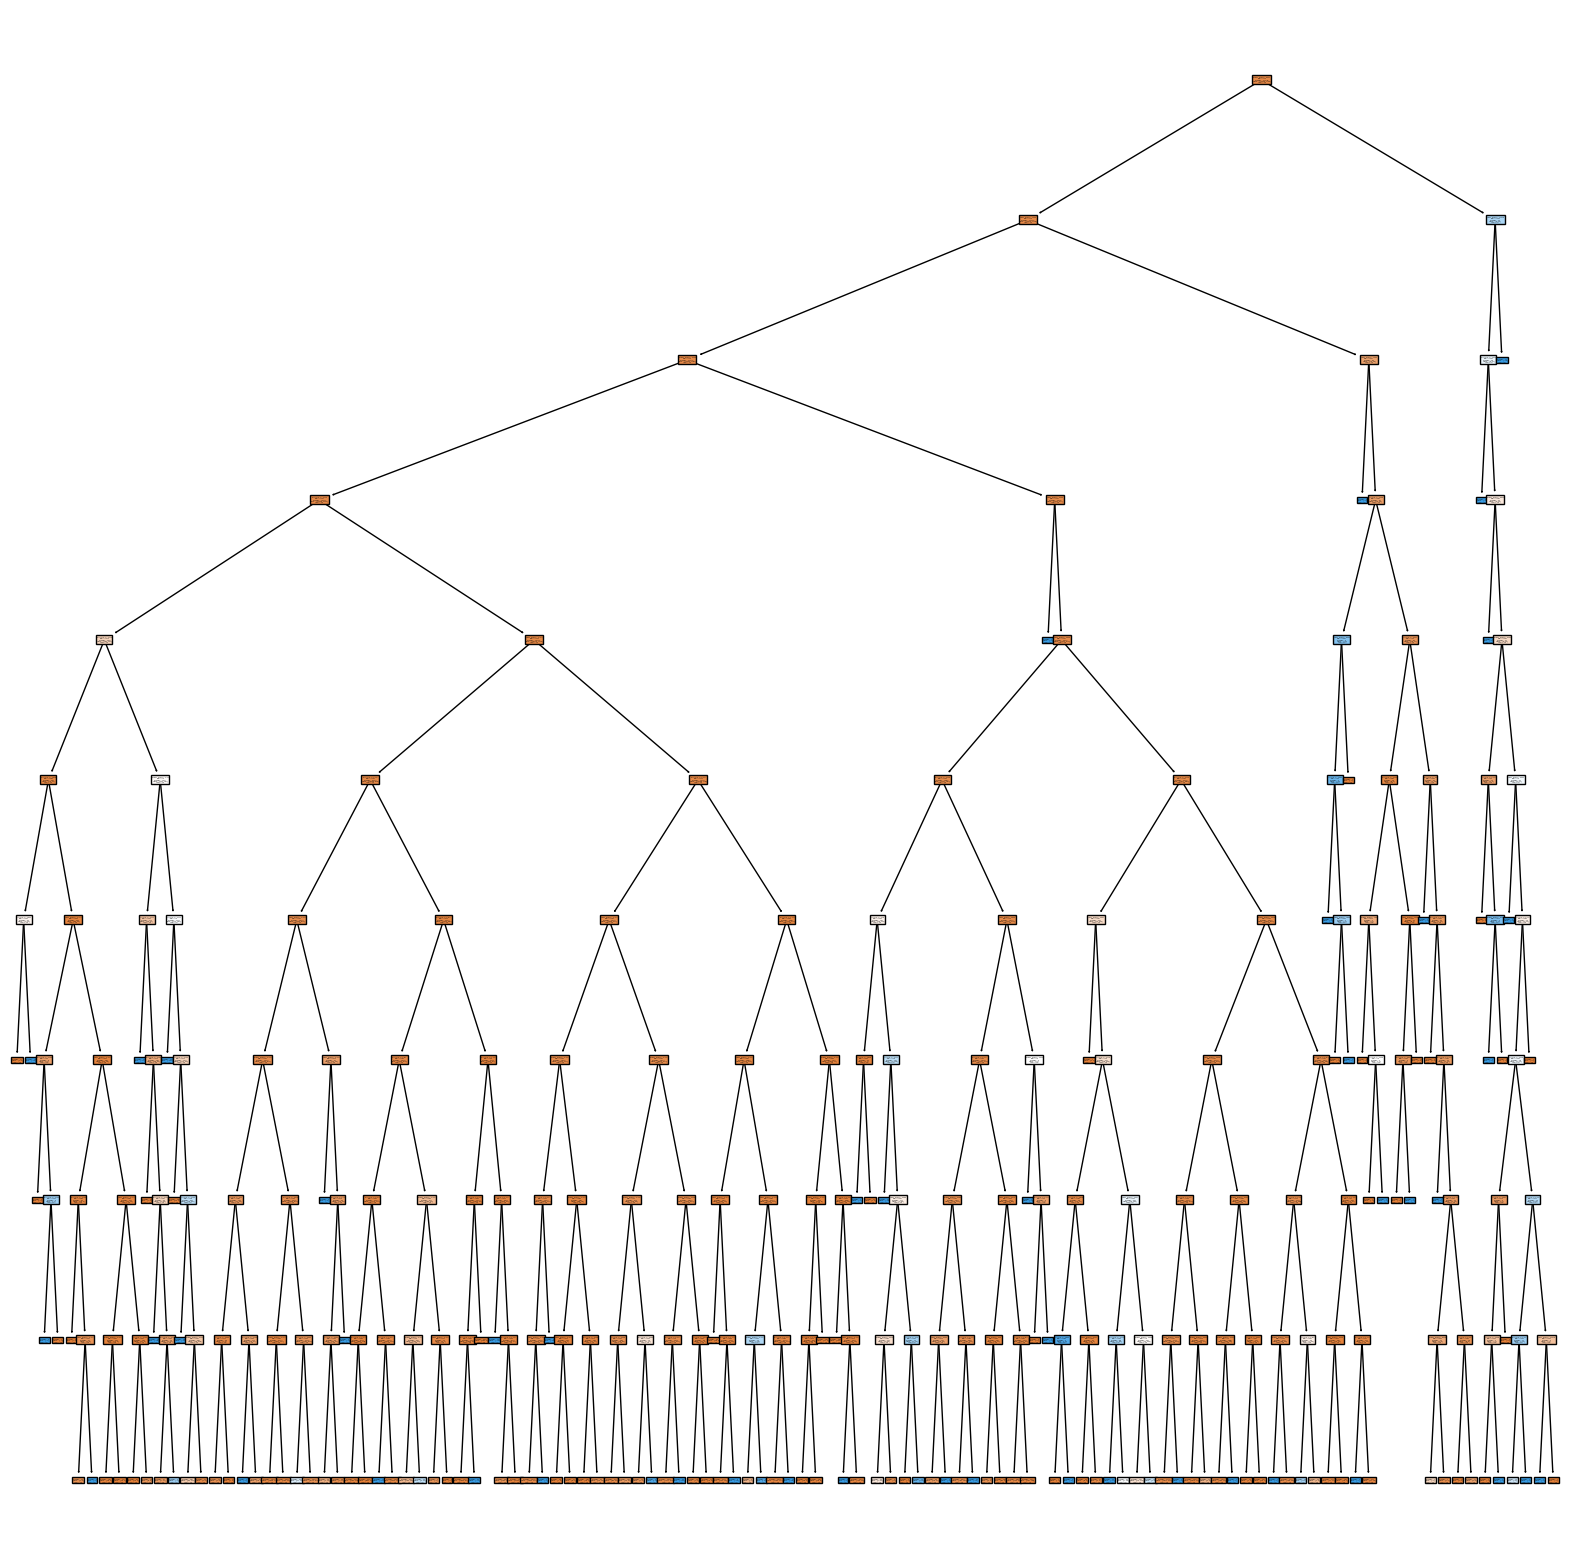

In [39]:
fn = ['Weekly_Sales', 'Fuel_Price']
cn = ['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=100)
tree.plot_tree(clf_maxdepth.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

# 8. Predicción usando dataset Tabla_1.csv

8.1 Label encoder de 'IsHoliday_x'

In [40]:
lenc = LabelEncoder()
df3['IsHoliday_x'] = lenc.fit_transform(df3['IsHoliday_x'])
df3['IsHoliday_x']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: IsHoliday_x, dtype: int64

8.2 Separación matriz de atributos y vector de label

- **x** contiene los valores de los atributos 'Weekly_Sales' y 'Fuel_Price'
- **y** contiene los valores del atributo 'IsHoliday_x'

In [41]:
x1= df3.iloc[:, [4, 7]].values
y1= df3.iloc[:,5].values

8.3 Normalización

In [42]:
x1= StandardScaler().fit_transform(x1)
x1

array([[ 1.27402115,  0.30673772],
       [-0.7201156 ,  0.48757841],
       [-1.18824134, -0.32088584],
       [ 1.09773915,  0.72692638],
       [ 1.4057901 , -0.59746572],
       [ 1.23658193,  0.55672338],
       [ 1.87163655, -1.83675631],
       [-1.21882002, -0.10547267],
       [ 0.07243292, -0.7171397 ],
       [ 0.63138001,  1.65772403],
       [-0.25169955,  0.24025217],
       [-0.33812783,  0.72692638],
       [ 1.44121168, -0.02834944],
       [-1.46422595, -1.16392258],
       [-0.34291   ,  0.73224522],
       [-0.46566713,  1.44231086],
       [ 0.60546866, -0.30226989],
       [-0.79274765, -1.00967611],
       [ 0.61553715, -0.33152353],
       [-0.76643474,  1.63910808],
       [-0.5176887 ,  0.85457862],
       [ 1.58475404,  1.10456428],
       [ 1.32166377, -1.80484325],
       [-0.77922208,  0.41843344],
       [-1.01088759,  0.34662905],
       [ 1.35276411,  0.39981748],
       [-1.29839598,  0.07536802],
       [-0.40394082, -1.63729967],
       [-0.79231793,

8.4 Mejor modelo KNN (Ver punto 6.1)

In [43]:
'Modelo'
KNN_tabla1 = KNeighborsClassifier(n_neighbors=k_optimo, weights='distance',algorithm='kd_tree')
'Entrenamiento'
KNN_tabla1.fit(x_train, y_train)
'Predicción'
y_pred_tabla1 = KNN_tabla1.predict(x1)
'Accuracy'
print('Accuracy KNN en Tabla_1.csv: %.3f' % (metrics.accuracy_score(y1, y_pred_tabla1)*100),'%')

Accuracy KNN en Tabla_1.csv: 94.000 %


8.5 Mejor modelo Ramdom Forest (Ver punto 7.4)

In [45]:
'Modelo'
clf_tabla1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, max_features='log2')
'Entrenamiento'
clf_tabla1.fit(x_train,y_train)
'Predicción'
y_predRF_tabla1 = clf_tabla1.predict(x1)
'Accuracy'
print('Accuracy RF en Tabla_1.csv: %.3f' % (metrics.accuracy_score(y1, y_predRF_tabla1)*100),'%')

Accuracy RF en Tabla_1.csv: 98.000 %


8.6 Diferencias de predicción entre KNN y Ramdom Forest

Al aplicar tanto KNN y Ramdo Forest al dataset de la Tabla_1, se observó que el modelo Ramdom Forest logró predecir el atributo 'IsHoliday_x' con una Accuracy del 98 %, a diferencia del modelo KNN con un 94 %.

Como podemos ver en los siguientes análisis de t-SNE tanto para KNN y Ramdom Forest, Ramdom Forest logra de mejor manera separar en dos grupos los datos a diferencia de KNN, donde los datos se observan más dispersos. Por otra parte, para Ramdom Forest podemos ver que el componente tsne2 ('Fuel_Price') agrupa más datos que el componente tsne1('Weekly_Sales'). Esto último concuerda con lo encontrado en la importancia de las features para el modelo Ramdom Forest(Ver punto 7.5).

En conclusión, Ramdom Forest es el mejor modelo para predecir si es feriado o no.

- Análisis TSNE para KNN

In [57]:
X_embedded = TSNE(n_components=2).fit_transform(x1)
X_embedded.shape

c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(50, 2)

In [58]:
tabla1 = pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2'])
tabla1['isholiday'] = y_pred_tabla1
tabla1['true_isholiday'] = y1
tabla1.head()

,tsne1,tsne2,isholiday,true_isholiday
0,-77.226547,-90.469009,0,0
1,-12.300225,32.179775,0,0
2,80.291878,50.488537,0,0
3,-113.919868,-93.793129,0,0
4,-17.912786,-138.457718,0,0


<AxesSubplot: xlabel='tsne1', ylabel='tsne2'>

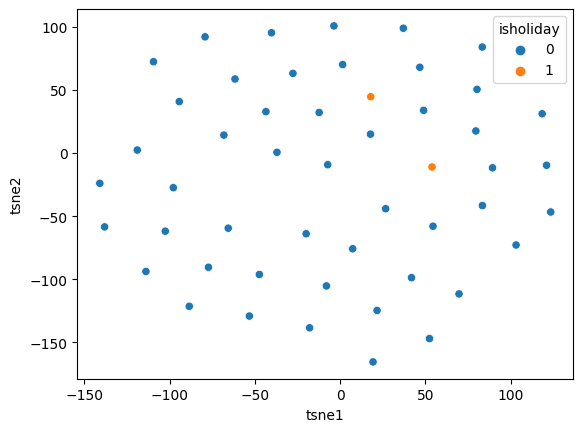

In [59]:
sns.scatterplot(data=tabla1, x='tsne1', y='tsne2', hue='isholiday')

<AxesSubplot: xlabel='tsne1', ylabel='tsne2'>

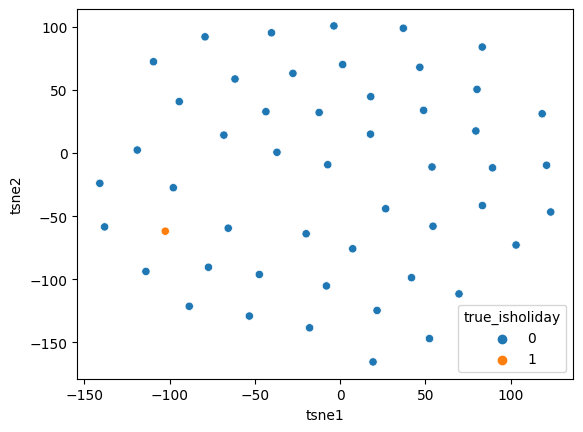

In [60]:
sns.scatterplot(data=tabla1, x='tsne1', y='tsne2', hue='true_isholiday')

- Análisis TSNE para Ramdom Forest

In [61]:
X_embeddedRF = TSNE(n_components=2).fit_transform(x1)
X_embeddedRF.shape

c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(50, 2)

In [62]:
tabla2 = pd.DataFrame(X_embeddedRF, columns=['tsne1', 'tsne2'])
tabla2['isholiday'] = y_predRF_tabla1
tabla2['true_isholiday'] = y1
tabla2.head()

,tsne1,tsne2,isholiday,true_isholiday
0,31.097551,-34.142559,0,0
1,-10.899086,-1.953216,0,0
2,-13.687367,38.117874,0,0
3,32.101997,-54.515213,0,0
4,74.210732,-18.078320,0,0


<AxesSubplot: xlabel='tsne1', ylabel='tsne2'>

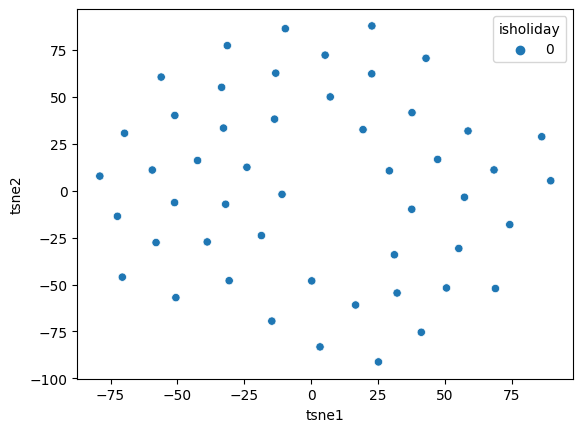

In [63]:
sns.scatterplot(data=tabla2, x='tsne1', y='tsne2', hue='isholiday')

<AxesSubplot: xlabel='tsne1', ylabel='tsne2'>

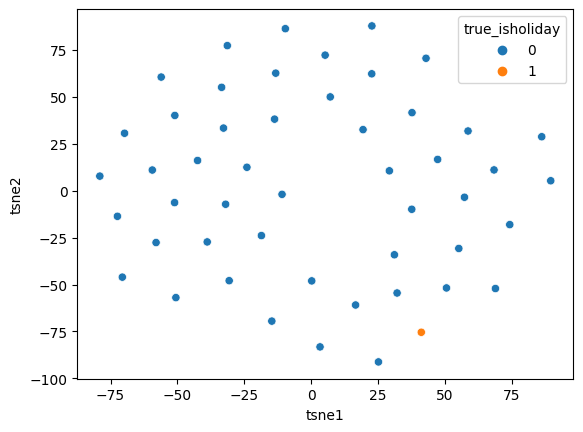

In [64]:
sns.scatterplot(data=tabla2, x='tsne1', y='tsne2', hue='true_isholiday')